In [3]:
import os
import math
import random
import operator
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import math

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from operator import itemgetter

In [115]:
def load_file(data_file_path):
    data_df = pd.read_csv(data_file_path, delimiter=";")
    return data_df


def compute_reward_individual(num_calls, cost_per_call = 1):
    return 11 - (cost_per_call * num_calls)


def plot_graph(x, y, key, bar_plot, digregard_x_axis):
    style = dict(size=8, color='black')
    new_x = []
    if digregard_x_axis:
        for i in range(1, len(x)+1):
            new_x.append(i)
    else:
        new_x = x
    fig, ax = plt.subplots(figsize = (14, 6))
    # plt.xticks(np.arange(len(x)), x, rotation=75)
    # ax.tick_params(axis='x', which='major', pad=20)
    if bar_plot:
        ax.bar(new_x, y, 0.75)
    else:
#         plt.xlim((x[0],x[-1]))
        ax.plot(x, y)
    if digregard_x_axis:
        for i in range(1, len(x)+1):
            ax.text(i, y[i-1], x[i-1], ha='center', **style)
#         key = ""
        ax.axes.get_xaxis().set_visible(False)
    # Setting title and labels.
    title = "Expected reward vs " +  str(key)
    ax.set(xlabel=str(key), ylabel='Expected Reward', title=title)
    # plt.axvline(x=0, color ="black")
    plt.axhline(y=0, color ="black")
    # ax.grid()
    plt.tight_layout()
    plt.show()
    

def plot_graph_balance(x, y, key, step):
    style = dict(size=8, color='black')
    fig, ax = plt.subplots(figsize = (14, 6))
    # plt.xticks(np.arange(len(x)), x, rotation=75)
    # ax.tick_params(axis='x', which='major', pad=20)
    ax.bar(x, y, 0.75)
    # Setting title and labels.
    title = "Expected reward vs " +  str(key)
    ax.set(xlabel= "Average yearly balance", ylabel='Expected Reward', title=title)
    # plt.axvline(x=0, color ="black")
    plt.axhline(y=0, color ="black")
    # ax.grid()
    plt.tight_layout()
    tick_labels = ['-ve', '-ve', '-ve']
    for i in range (1, len(x)+1):
        tick_labels.append(str((i-1)*step) +'-' + str(i * step))
    ax.set_xticklabels(tick_labels ,rotation='vertical')
    plt.show()

In [116]:
def compute_plot_value_rows_by_key(mkt_df, key, bar_plot, digregard_x_axis):
    values = mkt_df[key].unique()
    reward_value ={}
    total_count = 0
    for value_ref in values:
        reward_value[value_ref] = {'value':0.0, 'count':0}
    for index, row in mkt_df.iterrows():
        value_ref = row[key]
        reward_value[value_ref]['value'] += compute_reward_individual(row['campaign'])
        reward_value[value_ref]['count'] += 1
        total_count += 1
    reward_value_list = reward_value.items()
    reward_value_list_sorted = sorted(reward_value_list, key=lambda tup: tup[1]['value'], reverse=True)
    x = []
    y = []
    print("List of x,y pairs: ")
    i = 1
    for item in reward_value_list_sorted:
        print(item, end='\t')
        if i%6 == 0:
            print("\n")
        x.append(item[0])
        y.append((item[1]['value']/total_count))
        i += 1
    print("Y is:")
    print(y)
    plot_graph(x, y, key, bar_plot, digregard_x_axis)

    
def compute_plot_balance_value(mkt_df, step = 2500):
    min = mkt_df['balance'].values.min()
    max = mkt_df['balance'].values.max()
    reward_value = {}
    total_count = 0
    for i in range(min, max, step):
        reward_value[(int(i/step))] = {'value':0.05, 'count':0}
        print("Max is:", max)
    for index, row in mkt_df.iterrows():
        bal = row['balance']
        bal_index = None
        if bal <0.0:
            bal_index = -1
        else:
            bal_index = int(bal/step)
        reward_value[bal_index]['value'] += compute_reward_individual(row['campaign'])
        reward_value[bal_index]['count'] += 1
        total_count += 1
    x = [str(key) for key in reward_value.keys()]
    y = [(item['value']/total_count) for item in reward_value.values()]
    print(reward_value)
    plot_graph_balance(x, y, 'balance', step)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')



List of x,y pairs: 
(32, {'value': 17417.0, 'count': 2029})	(31, {'value': 16726.0, 'count': 1924})	(33, {'value': 16680.0, 'count': 1929})	(34, {'value': 16137.0, 'count': 1874})	(35, {'value': 15701.0, 'count': 1833})	(36, {'value': 15175.0, 'count': 1766})	

(30, {'value': 14748.0, 'count': 1715})	(37, {'value': 14262.0, 'count': 1649})	(39, {'value': 12401.0, 'count': 1450})	(38, {'value': 12215.0, 'count': 1415})	(40, {'value': 11434.0, 'count': 1318})	(41, {'value': 10721.0, 'count': 1254})	

(29, {'value': 10284.0, 'count': 1159})	(42, {'value': 10211.0, 'count': 1196})	(45, {'value': 10057.0, 'count': 1181})	(46, {'value': 9739.0, 'count': 1143})	(43, {'value': 9609.0, 'count': 1124})	(44, {'value': 9400.0, 'count': 1099})	

(47, {'value': 9039.0, 'count': 1058})	(28

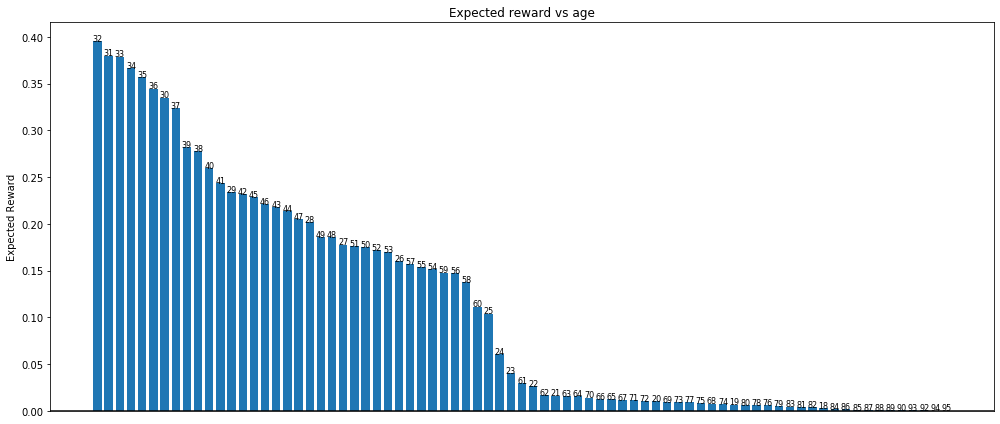

In [117]:
current_dir = os.getcwd()
mkt_df = load_file(current_dir + '/bank-full.csv')
mkt_df_filtered = mkt_df[(mkt_df['campaign']>=1) & (mkt_df['campaign']<=10)]
print(mkt_df_filtered.columns)
print("\n\n")
compute_plot_value_rows_by_key(mkt_df_filtered, 'age', True, True)
# compute_plot_value_rows_by_key(mkt_df_filtered, 'education', True, False)
# compute_plot_value_rows_by_key(mkt_df_filtered, 'marital', True, False)
# compute_plot_value_rows_by_key(mkt_df_filtered, 'job', True, False)
# compute_plot_value_rows_by_key(mkt_df_filtered, 'default', True, False)
# compute_plot_value_rows_by_key(mkt_df_filtered, 'housing', True, False)
# compute_plot_value_rows_by_key(mkt_df_filtered, 'loan', True, False)
# compute_plot_balance_value(mkt_df_filtered)